In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas_profiling as prof
from sklearn.base import BaseEstimator, TransformerMixin
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 300)
import datetime

In [2]:
df= pd.read_csv('Modeling_data.csv')

In [3]:
df.head()

,SKU,DC,Date,1_week_before_purchase_units,2_week_before_purchase_units,3_week_before_purchase_units,4_week_before_purchase_units,Fulfilled Units,Purchase Order Units,gradient_Purchase Order Units,mean_purchase_order_cat_by_past_1_week,mean_purchase_order_cat_by_past_2_week,mean_purchase_order_cat_by_past_3_week,mean_purchase_order_cat_by_past_4_week,past_other_dc_avg_order_effect,past_other_dc_comp_order_effect,std_purchase_order_cat_by_past_1_week,std_purchase_order_cat_by_past_2_week,std_purchase_order_cat_by_past_3_week,std_purchase_order_cat_by_past_4_week,DC_SKU,train_val,HighPriceProduct,LowPriceProduct,HighStdPriceProduct,LowStdPriceProduct,HighDemandProduct,LowDemandProduct,HighStdDemandProduct,LowStdDemandProduct,Seasonal,Comodity,Luxury,CashCow,ratio_sell_by_stock,holidays
0,SKU001,DC East,2017-10-02,NaN,NaN,NaN,NaN,10.0,10.0,14.0,38.888889,33.833333,40.666667,27.000000,-1.0,-1.0,24.033541,29.512144,42.767589,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,1
1,SKU001,DC East,2017-10-09,13.0,NaN,NaN,NaN,24.0,24.0,-5.0,17.000000,33.833333,40.666667,27.000000,0.0,1.0,17.792454,29.512144,42.767589,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,1
2,SKU001,DC East,2017-10-16,67.0,10.0,NaN,NaN,0.0,0.0,-12.0,33.000000,17.375000,40.666667,27.000000,0.0,1.0,40.383872,20.770429,42.767589,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0
3,SKU001,DC East,2017-10-23,85.0,24.0,10.0,NaN,0.0,0.0,1.5,7.555556,27.300000,25.750000,27.000000,-1.0,-1.0,13.875438,37.897669,21.684425,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0
4,SKU001,DC East,2017-10-30,21.0,0.0,24.0,10.0,3.0,3.0,3.5,7.555556,19.888889,16.200000,29.555556,0.0,1.0,13.875438,21.705094,27.510806,31.464707,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0


In [120]:
df[df['Purchase Order Units']>df['Purchase Order Units'].quantile(0.99)]

,SKU,DC,Date,1_week_before_purchase_units,2_week_before_purchase_units,3_week_before_purchase_units,4_week_before_purchase_units,Fulfilled Units,Purchase Order Units,gradient_Purchase Order Units,mean_purchase_order_cat_by_past_1_week,mean_purchase_order_cat_by_past_2_week,mean_purchase_order_cat_by_past_3_week,mean_purchase_order_cat_by_past_4_week,past_other_dc_avg_order_effect,past_other_dc_comp_order_effect,std_purchase_order_cat_by_past_1_week,std_purchase_order_cat_by_past_2_week,std_purchase_order_cat_by_past_3_week,std_purchase_order_cat_by_past_4_week,DC_SKU,train_val,HighPriceProduct,LowPriceProduct,HighStdPriceProduct,LowStdPriceProduct,HighDemandProduct,LowDemandProduct,HighStdDemandProduct,LowStdDemandProduct,Seasonal,Comodity,Luxury,CashCow,ratio_sell_by_stock,holidays
76,SKU002,DC East,2017-11-13,0.0,1022.0,0.0,2284.0,0.0,3461.0,2261.5,840.666667,2128.272727,1444.375000,715.625000,1.0,1.0,1120.846220,1245.850560,1405.272311,1151.884039,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
77,SKU002,DC East,2017-11-20,259.0,0.0,1022.0,0.0,3461.0,4523.0,-1730.5,1280.000000,655.272727,1321.250000,1236.875000,1.0,1.0,1713.928309,1316.921189,1743.654680,1535.310898,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,1
86,SKU002,DC East,2018-01-22,35.0,144.0,0.0,1730.0,516.0,2578.0,916.5,761.500000,2128.272727,1444.375000,531.142857,1.0,0.0,862.444035,1245.850560,1405.272311,942.722905,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
87,SKU002,DC East,2018-01-29,1.0,229.0,144.0,0.0,2062.0,2062.0,-1091.0,1280.000000,2128.272727,943.750000,1236.875000,1.0,1.0,1713.928309,1245.850560,1249.010666,1535.310898,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
92,SKU002,DC East,2018-03-05,23.0,294.0,0.0,396.0,1068.0,2880.0,-80.5,1150.250000,2128.272727,1444.375000,1443.250000,1.0,0.0,1501.397230,1245.850560,1405.272311,1607.397164,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
99,SKU002,DC East,2018-04-23,89.0,762.0,96.0,256.0,0.0,3552.0,1533.0,1150.250000,2128.272727,943.750000,1443.250000,1.0,0.0,1501.397230,1245.850560,1249.010666,1607.397164,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
100,SKU002,DC East,2018-04-30,1.0,486.0,762.0,96.0,3552.0,3552.0,-1715.0,1280.000000,2128.272727,1321.250000,1443.250000,1.0,1.0,1713.928309,1245.850560,1743.654680,1607.397164,DC East_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
111,SKU002,DC West,2017-11-13,602.0,1200.0,0.0,0.0,3083.0,3083.0,0.0,874.416667,703.090909,576.727273,587.454545,1.0,1.0,1300.737236,1040.825005,921.091753,974.857463,DC West_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
132,SKU002,DC West,2018-04-09,80.0,259.0,250.0,1243.0,1989.0,1989.0,-491.0,1013.818182,703.090909,832.200000,945.400000,0.0,1.0,1444.169368,1040.825005,1247.292160,1220.747876,DC West_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0
134,SKU002,DC West,2018-04-23,3.0,1989.0,1386.0,259.0,2927.0,2927.0,-202.0,733.545455,739.545455,1050.272727,1030.300000,1.0,1.0,949.515704,1310.268626,1321.536385,1350.054653,DC West_SKU002,t,0,1,0,1,1,0,1,0,1,1,0,0,11.804800,0


In [4]:
df['past_other_dc_avg_order_effect'] = pd.Categorical(df['past_other_dc_avg_order_effect'],ordered=True)
df['past_other_dc_comp_order_effect'] = pd.Categorical(df['past_other_dc_comp_order_effect'],ordered=True)

df['HighPriceProduct'] = pd.Categorical(df['HighPriceProduct'])
df['LowPriceProduct'] = pd.Categorical(df['LowPriceProduct'])

df['HighStdPriceProduct'] = pd.Categorical(df['HighStdPriceProduct'])
df['LowStdPriceProduct'] = pd.Categorical(df['LowStdPriceProduct'])

df['HighDemandProduct'] = pd.Categorical(df['HighDemandProduct'])
df['LowDemandProduct'] = pd.Categorical(df['LowDemandProduct'])

df['HighStdDemandProduct'] = pd.Categorical(df['HighStdDemandProduct'])
df['LowStdDemandProduct'] = pd.Categorical(df['LowStdDemandProduct'])

df['Seasonal'] = pd.Categorical(df['Seasonal'])

df['Comodity'] = pd.Categorical(df['Comodity'])

df['Luxury'] = pd.Categorical(df['Luxury'])

df['CashCow'] = pd.Categorical(df['CashCow'])

df['holidays'] = pd.Categorical(df['holidays'])



In [5]:
#df['DC'].rename(mapper = {'DC East':1,'DC West':0},axis='index')

In [31]:
#df['DC'] = 
    pd.Categorical()

#df['SKU'] = pd.Categorical(df['SKU'],categories=np.arange(1,51))

[DC East, DC East, DC East, DC East, DC East, ..., DC West, DC West, DC West, DC West, DC West]
Length: 5200
Categories (2, object): [DC East, DC West]

In [6]:
model_columns= ['1_week_before_purchase_units',
 '2_week_before_purchase_units',
 '3_week_before_purchase_units',
 '4_week_before_purchase_units',
 'CashCow',
 'Comodity',
 'HighDemandProduct',
 'HighPriceProduct',
 'HighStdDemandProduct',
 'HighStdPriceProduct',
 'LowDemandProduct',
 'LowPriceProduct',
 'LowStdDemandProduct',
 'LowStdPriceProduct',
 'Luxury',
 'Seasonal',
 'gradient_Purchase Order Units',
 'holidays',
 'mean_purchase_order_cat_by_past_1_week',
 'mean_purchase_order_cat_by_past_2_week',
 'mean_purchase_order_cat_by_past_3_week',
 'mean_purchase_order_cat_by_past_4_week',
 'past_other_dc_avg_order_effect',
 'past_other_dc_comp_order_effect',
 'ratio_sell_by_stock',
 'std_purchase_order_cat_by_past_1_week',
 'std_purchase_order_cat_by_past_2_week',
 'std_purchase_order_cat_by_past_3_week',
 'std_purchase_order_cat_by_past_4_week']
y_column = 'Purchase Order Units'

In [7]:
df.head()

,SKU,DC,Date,1_week_before_purchase_units,2_week_before_purchase_units,3_week_before_purchase_units,4_week_before_purchase_units,Fulfilled Units,Purchase Order Units,gradient_Purchase Order Units,mean_purchase_order_cat_by_past_1_week,mean_purchase_order_cat_by_past_2_week,mean_purchase_order_cat_by_past_3_week,mean_purchase_order_cat_by_past_4_week,past_other_dc_avg_order_effect,past_other_dc_comp_order_effect,std_purchase_order_cat_by_past_1_week,std_purchase_order_cat_by_past_2_week,std_purchase_order_cat_by_past_3_week,std_purchase_order_cat_by_past_4_week,DC_SKU,train_val,HighPriceProduct,LowPriceProduct,HighStdPriceProduct,LowStdPriceProduct,HighDemandProduct,LowDemandProduct,HighStdDemandProduct,LowStdDemandProduct,Seasonal,Comodity,Luxury,CashCow,ratio_sell_by_stock,holidays
0,SKU001,DC East,2017-10-02,NaN,NaN,NaN,NaN,10.0,10.0,14.0,38.888889,33.833333,40.666667,27.000000,-1.0,-1.0,24.033541,29.512144,42.767589,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,1
1,SKU001,DC East,2017-10-09,13.0,NaN,NaN,NaN,24.0,24.0,-5.0,17.000000,33.833333,40.666667,27.000000,0.0,1.0,17.792454,29.512144,42.767589,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,1
2,SKU001,DC East,2017-10-16,67.0,10.0,NaN,NaN,0.0,0.0,-12.0,33.000000,17.375000,40.666667,27.000000,0.0,1.0,40.383872,20.770429,42.767589,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0
3,SKU001,DC East,2017-10-23,85.0,24.0,10.0,NaN,0.0,0.0,1.5,7.555556,27.300000,25.750000,27.000000,-1.0,-1.0,13.875438,37.897669,21.684425,35.665109,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0
4,SKU001,DC East,2017-10-30,21.0,0.0,24.0,10.0,3.0,3.0,3.5,7.555556,19.888889,16.200000,29.555556,0.0,1.0,13.875438,21.705094,27.510806,31.464707,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0


In [8]:
df = df.dropna()

train = df[(df['train_val']=='t')]
test = df[(df['train_val']=='v')]

xtrain= train[model_columns]
ytrain = train[y_column]

xtest= test[model_columns]
ytest = test[y_column]

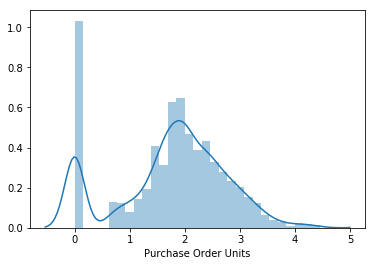

In [126]:
sns.distplot(np.log(np.sqrt(ytrain)+1))


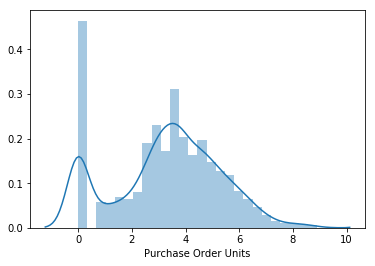

In [127]:
sns.distplot(np.log(ytrain+1))


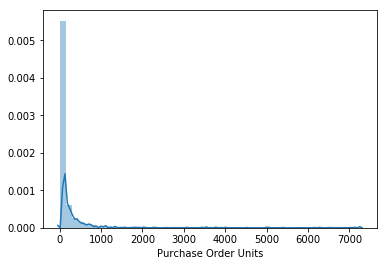

In [58]:
sns.distplot(ytrain)

## Linear Regression

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model

reg = linear_model.LinearRegression(normalize = True)

#simple Linear regression without any complicated features
X = xtrain.values
y = np.log(ytrain.values+15)
print(X.shape, y.shape)


from sklearn.model_selection import KFold
kf = KFold(n_splits=10)


score = cross_val_score(reg, X, y, cv=kf,scoring = "neg_mean_squared_error")

print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(3100, 29) (3100,)
cv_rmse 1.1653881046639223


In [402]:
def plot(ytrain,ytrain_pred,ytest,ytestpred,reverse=False):
    fig,[ax,ax2] = plt.subplots(2,figsize=(6,12))
    
    if reverse == True:
        ytrain = np.exp(ytrain)-15
        ytrain_pred = np.exp(ytrain_pred)-151
        ytest = np.exp(ytest)-15
        ytestpred = np.exp(ytestpred)-15
        
    
    
    ax.scatter(ytrain,ytrain_pred)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    ax.set_xlabel('train Actual y')
    ax.set_ylabel('train predicted y')
    
    ax2.scatter(ytest,ytestpred)
    x = np.linspace(*ax2.get_xlim())
    ax2.plot(x, x)
    ax2.set_xlabel('test Actual y')
    ax2.set_ylabel('test predicted y')
    plt.savefig('Train_XvsY.png');

In [92]:
reg.fit(X,np.log(y+15))
ypred = reg.predict(xtrain)
ytestpred = reg.predict(xtest)

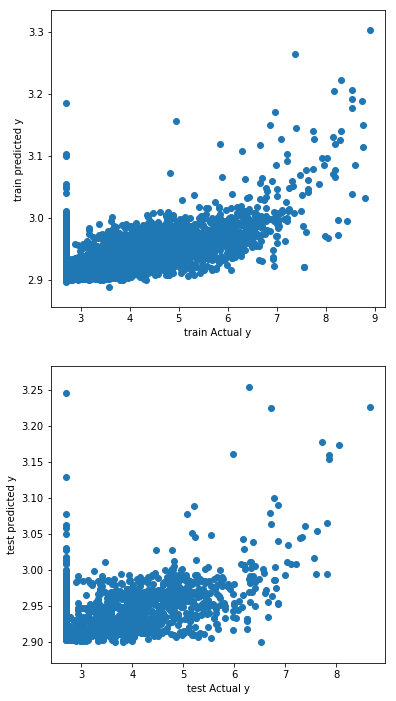

In [93]:
plot(np.log(ytrain+15),ypred,np.log(ytest+15),ytestpred,reverse=False)

In [58]:
import statsmodels.api as sm
model = sm.OLS(y, np.array(X,dtype=int))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     44.44
Date:                Tue, 26 Feb 2019   Prob (F-statistic):          2.75e-172
Time:                        16:11:05   Log-Likelihood:                -6099.6
No. Observations:                3100   AIC:                         1.225e+04
Df Residuals:                    3076   BIC:                         1.239e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002   6.75e-05      2.538      0.0

In [59]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
scaler = StandardScaler()
scaler2 = MinMaxScaler()

In [360]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dtr = DecisionTreeRegressor(max_depth=15,random_state=42,min_impurity_decrease=0.00015)
#min_samples_leaf=2,min_samples_split=4,
dtr.fit(xtrain, np.log(ytrain+1))



DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.00015,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [361]:
ypred = dtr.predict(xtrain)
ytestpred = dtr.predict(xtest.values)

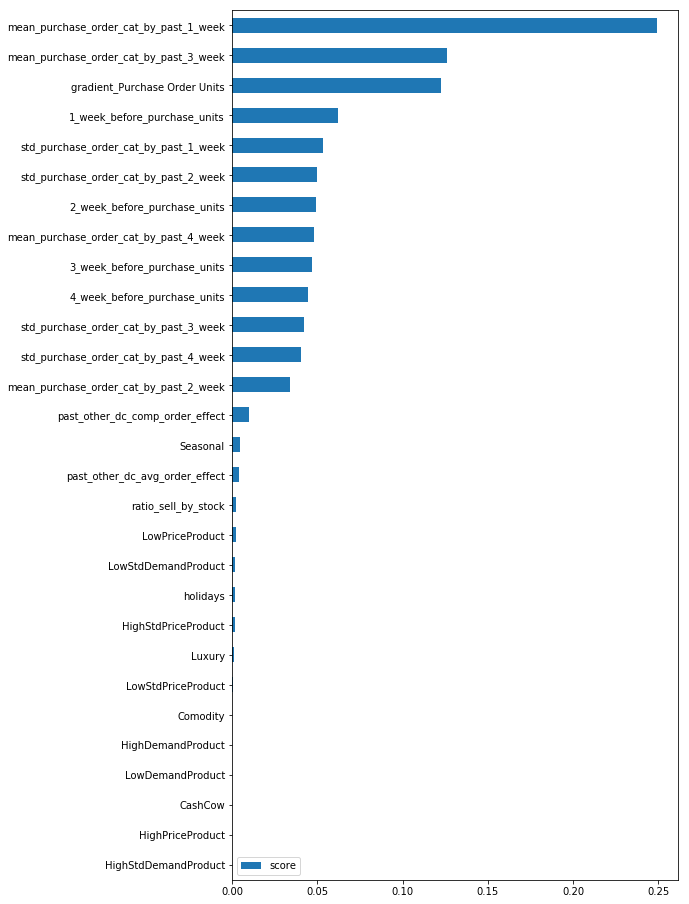

In [397]:

keys =xtrain.columns
values = dtr.feature_importances_
fig,ax = plt.subplots(1,figsize=(8,16))
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh',ax=ax)
plt.savefig('Feature Importance.png');

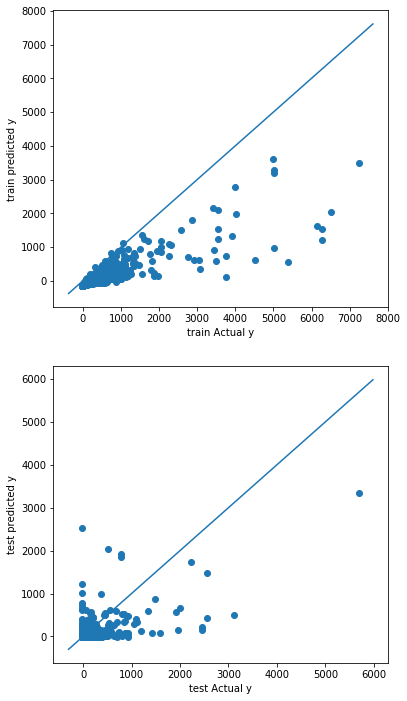

In [403]:
plot(np.log(ytrain+1),ypred,np.log(ytest+1),ytestpred,reverse=True)

In [364]:
train['Predicted_y'] = ypred
test['Predicted_y']=ytestpred

In [365]:
train['Cut'] = train['Purchase Order Units'] - train['Fulfilled Units']
train['Cut_y'] = train['Purchase Order Units'] - (np.exp(train['Predicted_y'])-1)

In [366]:
print(train['Cut'].sum())
print(train['Cut_y'].sum())

172805.0
39068.726275224515


In [380]:
(172805-39068)*100/172805

77.3918578744828

In [367]:
test['Cut'] = test['Purchase Order Units'] - test['Fulfilled Units']
test['Cut_y'] = test['Purchase Order Units'] - (np.exp(test['Predicted_y'])-1)

In [368]:
print(test['Cut'].sum())
print(test['Cut_y'].sum())

40193.0
-37428.80973639598


In [382]:
(37428)*100/40193

93.1206926579255

In [386]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

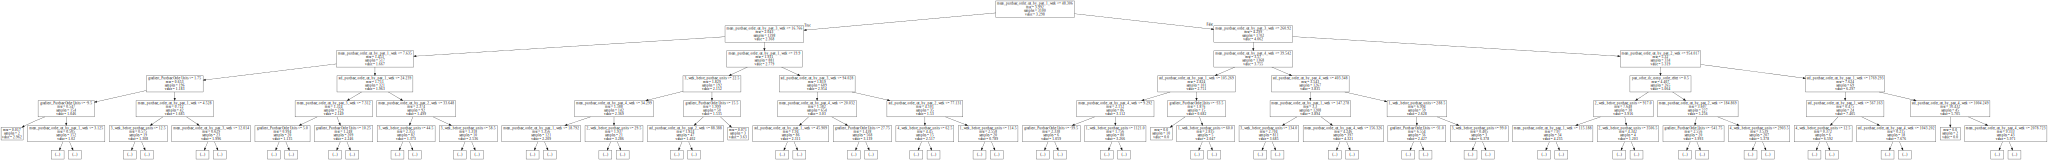

In [391]:
from IPython.display import SVG
from graphviz import Source
graph = Source(tree.export_graphviz(dtr, out_file=None,feature_names=xtrain.columns,max_depth=5))
SVG(graph.pipe(format='svg'))

In [392]:
graph.format = 'png'
graph.render('dtree_render2',view=True)

'dtree_render2.png'

In [98]:
score = cross_val_score(dtr, xtrain,  np.log(ytrain+1), cv=kf,scoring = "neg_mean_squared_error")
print("tree_cv_rmse",(np.exp(np.mean(np.sqrt(np.abs(score))))-1)*100,"+_",(np.exp(np.std(np.sqrt(np.abs(score))))-1)*100)

tree_cv_rmse 697.5521071053861 +_ 26.761002195470663


### Gradient Boosting with Categorical features

In [12]:
from catboost import CatBoostRegressor

In [13]:
CatBoostRegressor?

Init signature: CatBoostRegressor(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function='RMSE', border_count=None, feature_border_type=None, fold_permutation_block_size=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None, custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None, used_ram_limit=None, gpu_ram_part=None, pinned_memory_size=None, allow_writing_files=None, final_ctr_co

In [9]:
# Prepare Categorical Variables
categorical = ['CashCow',
 'Comodity',
 'HighDemandProduct',
 'HighPriceProduct',
 'HighStdDemandProduct',
 'HighStdPriceProduct',
 'LowDemandProduct',
 'LowPriceProduct',
 'LowStdDemandProduct',
 'LowStdPriceProduct',
 'Luxury',
 'Seasonal',
 'holidays', 'past_other_dc_avg_order_effect',
 'past_other_dc_comp_order_effect']
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]
categorical_features_pos = column_index(xtrain,categorical)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(xtrain, ytrain, train_size=0.75, random_state=42)


In [65]:
cb_model = CatBoostRegressor(iterations=300,
                             learning_rate=0.01,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.3,colsample_bylevel=0.6,
                             od_type='Iter',
                             metric_period = 1,
                             od_wait=100)
cb_model.fit(X_train, np.log(y_train+15),eval_set=(X_validation,np.log(y_validation+15)),
             cat_features=categorical_features_pos,
             use_best_model=True,
             verbose=True,plot=True,early_stopping_rounds=20)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4.2129320	test: 4.2380651	best: 4.2380651 (0)	total: 23.3ms	remaining: 6.98s
1:	learn: 4.1749391	test: 4.2003896	best: 4.2003896 (1)	total: 149ms	remaining: 22.2s
2:	learn: 4.1374005	test: 4.1629032	best: 4.1629032 (2)	total: 223ms	remaining: 22.1s
3:	learn: 4.0995320	test: 4.1250701	best: 4.1250701 (3)	total: 261ms	remaining: 19.3s
4:	learn: 4.0620641	test: 4.0877711	best: 4.0877711 (4)	total: 284ms	remaining: 16.8s
5:	learn: 4.0260642	test: 4.0517615	best: 4.0517615 (5)	total: 394ms	remaining: 19.3s
6:	learn: 3.9893828	test: 4.0151655	best: 4.0151655 (6)	total: 406ms	remaining: 17s
7:	learn: 3.9524140	test: 3.9783728	best: 3.9783728 (7)	total: 420ms	remaining: 15.3s
8:	learn: 3.9168650	test: 3.9427902	best: 3.9427902 (8)	total: 469ms	remaining: 15.2s
9:	learn: 3.8810837	test: 3.9069621	best: 3.9069621 (9)	total: 506ms	remaining: 14.7s
10:	learn: 3.8452891	test: 3.8713432	best: 3.8713432 (10)	total: 523ms	remaining: 13.7s
11:	learn: 3.8104394	test: 3.8366978	best: 3.8366978 

In [66]:
cb_model.best_score_

{'learn': {'RMSE': 0.9320204185647982},
 'validation_0': {'RMSE': 0.9701117581103325}}

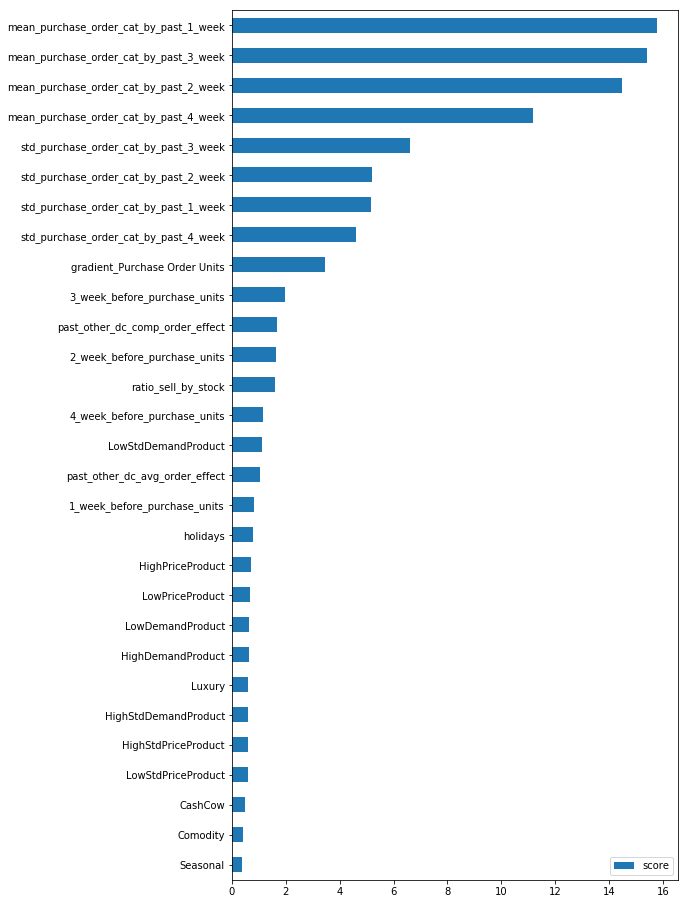

In [67]:

keys = cb_model.feature_names_
values = cb_model.feature_importances_
fig,ax = plt.subplots(1,figsize=(8,16))
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh',ax=ax);

In [68]:
ypred = cb_model.predict(xtrain)
ytestpred = cb_model.predict(xtest)

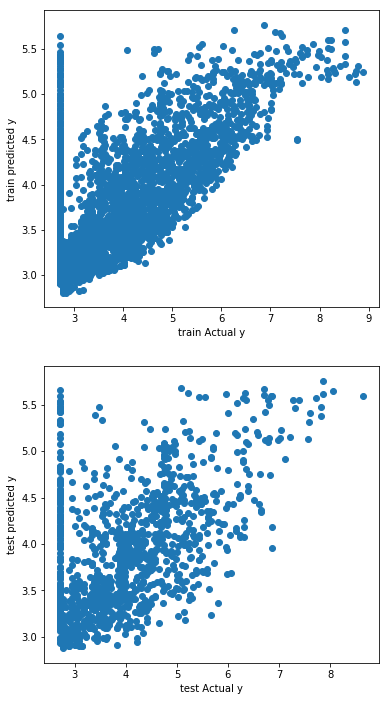

In [71]:
plot(np.log(ytrain+15),ypred,np.log(ytest+15),ytestpred,reverse=False)

In [374]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2,
                                max_features='auto', min_impurity_decrease=0.0001, min_impurity_split=None)

In [375]:
RF.fit(xtrain,np.log(ytrain+1))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0001, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [376]:
ypred = RF.predict(xtrain)
ytestpred = RF.predict(xtest)

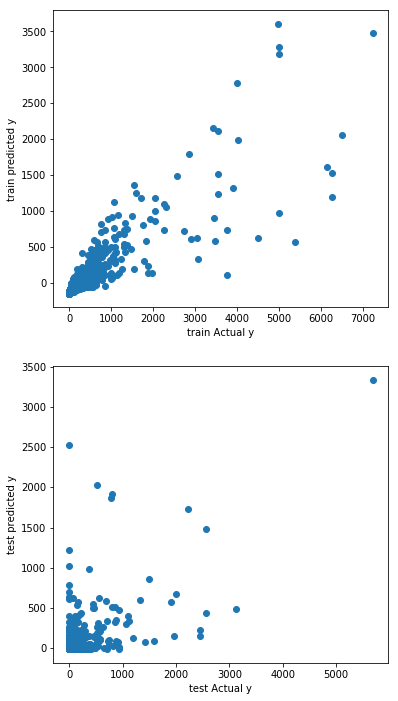

In [377]:
plot(np.log(ytrain+1),ypred,np.log(ytest+1),ytestpred,reverse=True)

In [378]:
train['Predicted_y'] = ypred
test['Predicted_y']=ytestpred
train['Cut'] = train['Purchase Order Units'] - train['Fulfilled Units']
train['Cut_y'] = train['Purchase Order Units'] - (np.exp(train['Predicted_y'])-1)
print(train['Cut'].sum())
print(train['Cut_y'].sum())
test['Cut'] = test['Purchase Order Units'] - test['Fulfilled Units']
test['Cut_y'] = test['Purchase Order Units'] - (np.exp(test['Predicted_y'])-1)
print(test['Cut'].sum())
print(test['Cut_y'].sum())

172805.0
193295.0384979989
40193.0
49227.17563821111


In [393]:
xtrain.shape

(3100, 29)

In [394]:
df.head()

,SKU,DC,Date,1_week_before_purchase_units,2_week_before_purchase_units,3_week_before_purchase_units,4_week_before_purchase_units,Fulfilled Units,Purchase Order Units,gradient_Purchase Order Units,mean_purchase_order_cat_by_past_1_week,mean_purchase_order_cat_by_past_2_week,mean_purchase_order_cat_by_past_3_week,mean_purchase_order_cat_by_past_4_week,past_other_dc_avg_order_effect,past_other_dc_comp_order_effect,std_purchase_order_cat_by_past_1_week,std_purchase_order_cat_by_past_2_week,std_purchase_order_cat_by_past_3_week,std_purchase_order_cat_by_past_4_week,DC_SKU,train_val,HighPriceProduct,LowPriceProduct,HighStdPriceProduct,LowStdPriceProduct,HighDemandProduct,LowDemandProduct,HighStdDemandProduct,LowStdDemandProduct,Seasonal,Comodity,Luxury,CashCow,ratio_sell_by_stock,holidays
4,SKU001,DC East,2017-10-30,21.0,0.0,24.0,10.0,3.0,3.0,3.5,7.555556,19.888889,16.20,29.555556,0.0,1.0,13.875438,21.705094,27.510806,31.464707,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0
5,SKU001,DC East,2017-11-06,0.0,0.0,0.0,24.0,7.0,7.0,7.0,17.000000,19.888889,22.75,24.750000,0.0,1.0,17.792454,21.705094,21.130547,30.485359,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,1
6,SKU001,DC East,2017-11-13,387.0,3.0,0.0,0.0,17.0,17.0,23.0,17.000000,19.888889,22.75,21.000000,0.0,-1.0,17.792454,21.705094,21.130547,20.410082,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0
7,SKU001,DC East,2017-11-20,2.0,7.0,3.0,0.0,11.0,53.0,12.5,33.000000,17.375000,22.75,21.000000,-1.0,1.0,40.383872,20.770429,21.130547,20.410082,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,1
8,SKU001,DC East,2017-11-27,0.0,17.0,7.0,3.0,42.0,42.0,-21.5,38.888889,27.300000,25.75,21.000000,-1.0,1.0,24.033541,37.897669,21.684425,20.410082,DC East_SKU001,t,0,1,1,0,0,1,0,1,0,0,0,0,15.454091,0


In [395]:
df['Date'].min()

'2017-10-30'

In [396]:
df['Date'].max()

'2018-09-24'